## Aaditya Deshmukh (Big mart Sales Problem)

- IMS Proschool Pune.
- LinkedIn ID- https://www.linkedin.com/in/aaditya-deshmukh-50174a1a3
- Github URL - https://github.com/Aaditya28-D/Projects-2020

### Loading All required packages

In [5]:
import pandas as pd
import os as os
import numpy as np

#visuals
import seaborn as sns
import matplotlib.pyplot as plt

#To split the data
from sklearn.model_selection import train_test_split

#Model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

import warnings as warnings
warnings.filterwarnings('ignore')

In [6]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
train=pd.read_csv(r'C:\Users\Aaditya Deshmukh\Desktop\IMS\1. PGD Data Science\1. Bussiness Analytics\6. Linear Regression\3. LVC 1\Big mart problem data\train_kOBLwZA.csv')
test=pd.read_csv(r'C:\Users\Aaditya Deshmukh\Desktop\IMS\1. PGD Data Science\1. Bussiness Analytics\6. Linear Regression\3. LVC 1\Big mart problem data\test_t02dQwI.csv')

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
train.shape

(8523, 12)

In [10]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
train.describe(include=np.object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


# EDA

EDA for train data

In [14]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


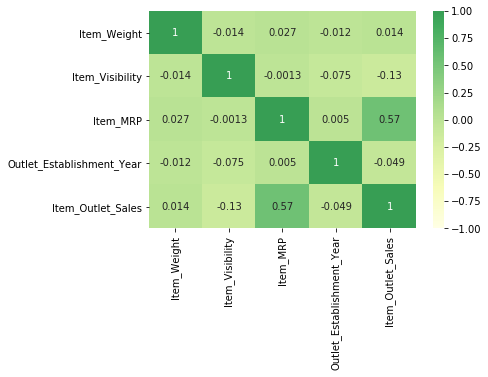

In [15]:
sns.heatmap(train.corr(),annot=True,vmin=-1,vmax=1,center=0.5, cmap='YlGn')

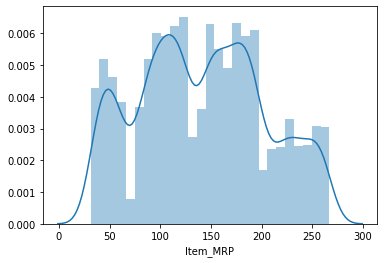

In [16]:
sns.distplot(train['Item_MRP'])

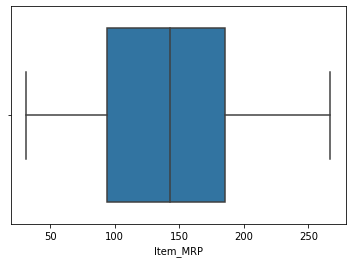

In [17]:
sns.boxplot(train['Item_MRP'])

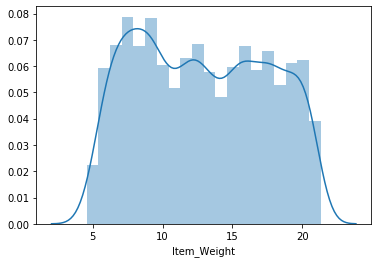

In [18]:
sns.distplot(train['Item_Weight'])

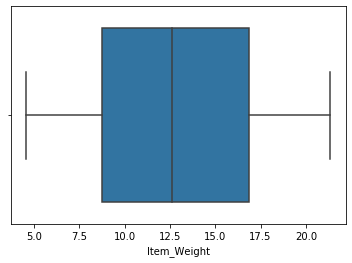

In [19]:
sns.boxplot(train['Item_Weight'])

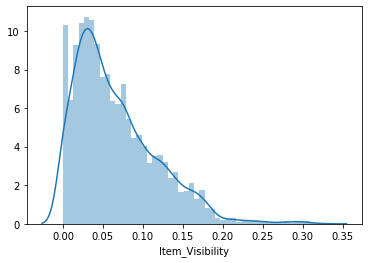

In [20]:
sns.distplot(train['Item_Visibility'], hist=True)

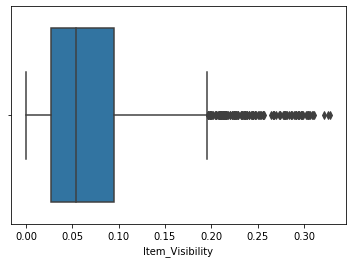

In [21]:
sns.boxplot(train['Item_Visibility'])

In [22]:
m3s=np.mean(train['Item_Visibility'])+3*np.std(train['Item_Visibility'])

In [23]:
print(train[train['Item_Visibility']>m3s]['Item_Visibility'].count())
print(train[train['Item_Visibility']>m3s]['Item_Visibility'].count()/train.shape[0])

95
0.011146309984747155


In [24]:
p99=np.percentile(train['Item_Visibility'],99)

In [25]:
print(train[train['Item_Visibility']>np.percentile(train['Item_Visibility'],99)]['Item_Visibility'].count())
print(train[train['Item_Visibility']>np.percentile(train['Item_Visibility'],99)]['Item_Visibility'].count()/train.shape[0])

86
0.010090343775665846


In [26]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [27]:
train.loc[(train.Item_Visibility>p99),'Item_Visibility']=p99

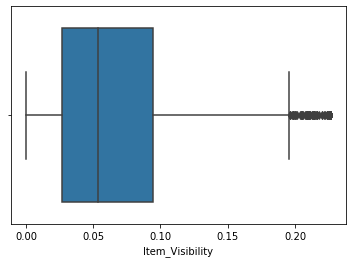

In [28]:
sns.boxplot(train['Item_Visibility'])

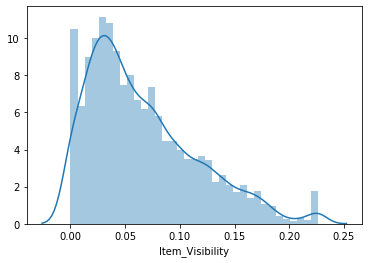

In [29]:
sns.distplot(train['Item_Visibility'], hist=True)

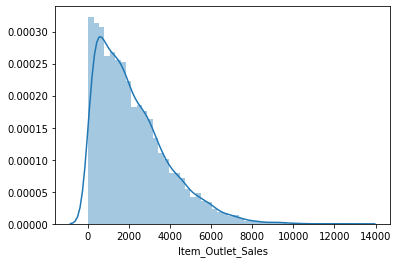

In [30]:
sns.distplot(train['Item_Outlet_Sales'])

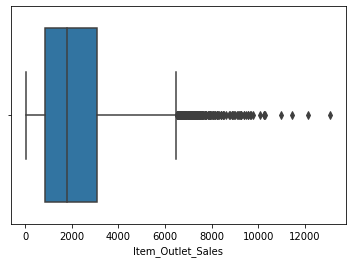

In [31]:
sns.boxplot(train['Item_Outlet_Sales'])

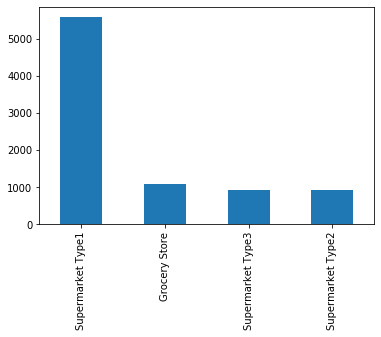

In [32]:
train['Outlet_Type'].value_counts().plot.bar()

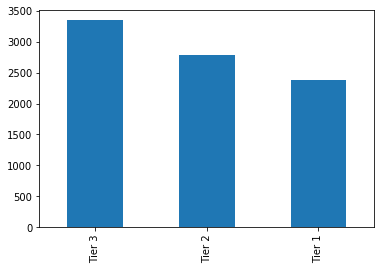

In [33]:
train['Outlet_Location_Type'].value_counts().plot.bar()

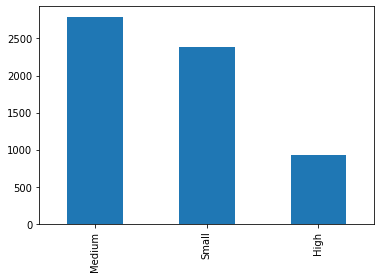

In [34]:
train['Outlet_Size'].value_counts().plot.bar()

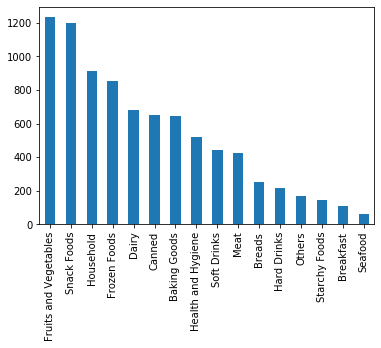

In [35]:
train['Item_Type'].value_counts().plot.bar()

In [36]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
train['Item_Identifier'].str[:2].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

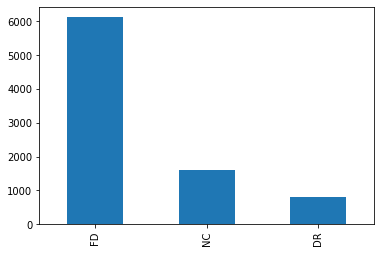

In [38]:

train['Item_Identifier'].str[:2].value_counts().plot.bar()

In [39]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

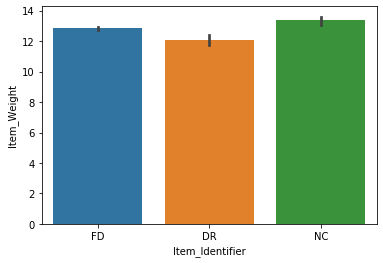

In [40]:
sns.barplot(train['Item_Identifier'].str[:2], train['Item_Weight'])

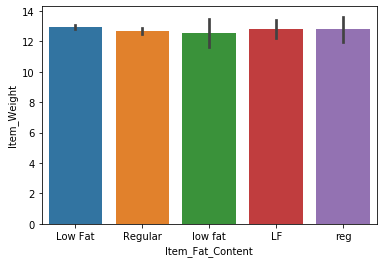

In [41]:
sns.barplot(train['Item_Fat_Content'], train['Item_Weight'])

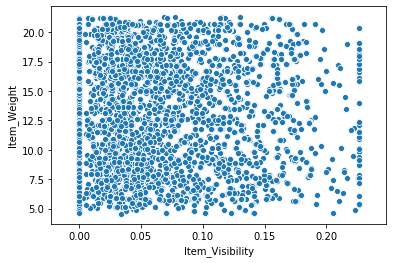

In [42]:
sns.scatterplot(train['Item_Visibility'],train['Item_Weight'])

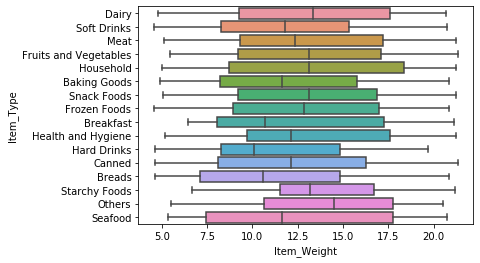

In [43]:
sns.boxplot(train['Item_Weight'], train['Item_Type'])

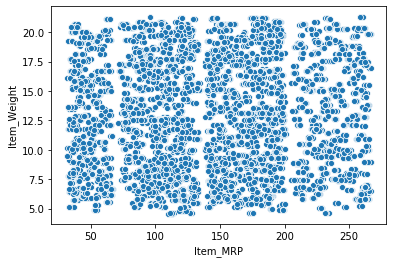

In [44]:
sns.scatterplot(train['Item_MRP'],train['Item_Weight'])

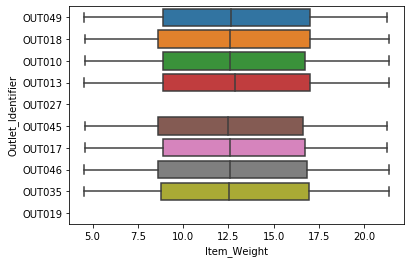

In [45]:
sns.boxplot(y=train['Outlet_Identifier'],x=train['Item_Weight'])

In [46]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


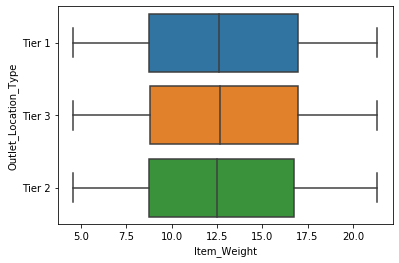

In [47]:
sns.boxplot(y=train['Outlet_Location_Type'],x=train['Item_Weight'])

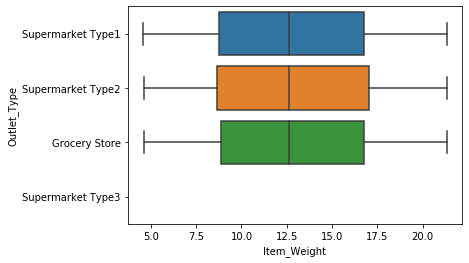

In [48]:
sns.boxplot(y=train['Outlet_Type'],x=train['Item_Weight'])

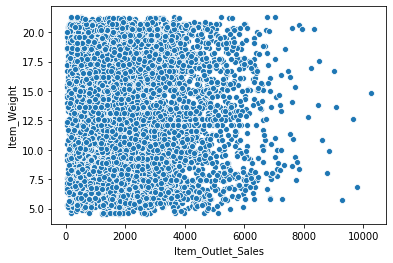

In [49]:
sns.scatterplot(train['Item_Outlet_Sales'],train['Item_Weight'])

In [50]:
pd.crosstab(train['Item_Type'], train['Item_Weight'].isnull())

Item_Weight,False,True
Item_Type,,
Baking Goods,536,112
Breads,204,47
Breakfast,89,21
Canned,539,110
Dairy,566,116
Frozen Foods,718,138
Fruits and Vegetables,1019,213
Hard Drinks,183,31
Health and Hygiene,430,90


In [51]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].groupby(train['Item_Type']).transform('mean'))

In [52]:
train['Item_Weight'].isnull().sum()

0

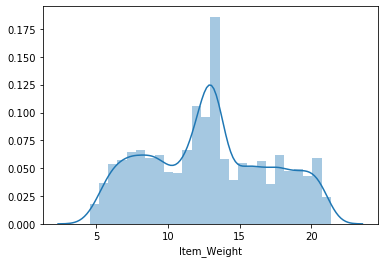

In [53]:
sns.distplot(train['Item_Weight'])

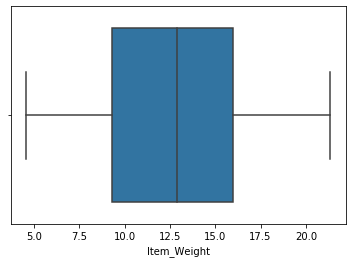

In [54]:
sns.boxplot(train['Item_Weight'])

In [55]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


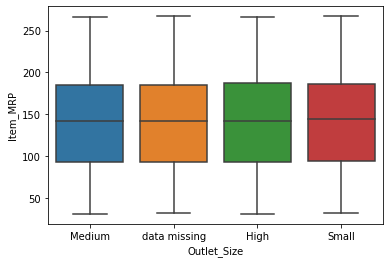

In [56]:
sns.boxplot(train['Outlet_Size'].fillna('data missing'), train['Item_MRP'])

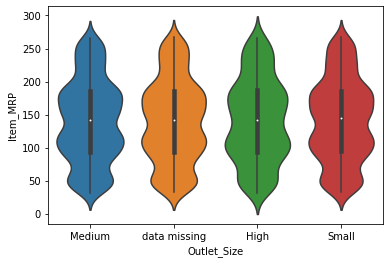

In [57]:
sns.violinplot(train['Outlet_Size'].fillna('data missing'), train['Item_MRP'])

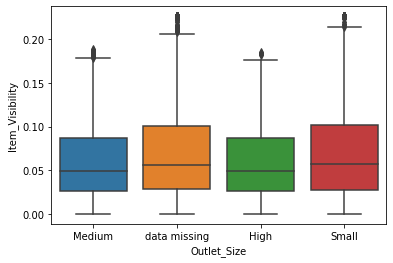

In [58]:
sns.boxplot(train['Outlet_Size'].fillna('data missing'), train['Item_Visibility'])

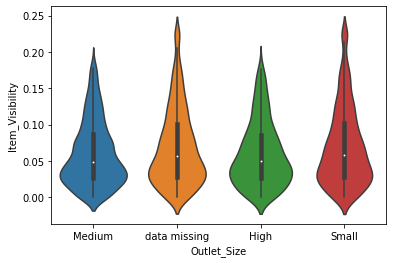

In [59]:
sns.violinplot(train['Outlet_Size'].fillna('data missing'), train['Item_Visibility'])

In [60]:
train['Outlet_Size']=train['Outlet_Size'].fillna('Small')

In [61]:
train['Outlet_Size'].isnull().sum()

0

In [62]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

EDA for test data

In [63]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


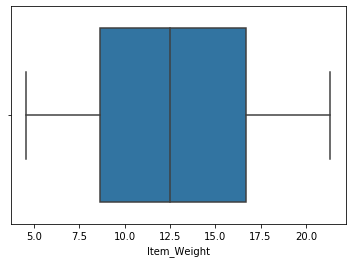

In [64]:
sns.boxplot(test['Item_Weight'])

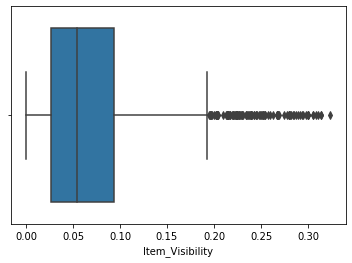

In [65]:
sns.boxplot(test['Item_Visibility'])

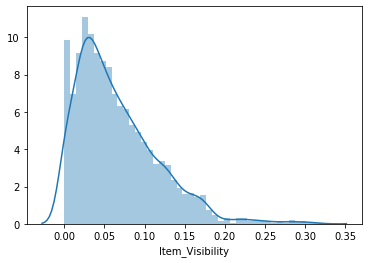

In [66]:
sns.distplot(test['Item_Visibility'])

In [67]:
m3ss=np.mean(test['Item_Visibility'])+3*np.std(test['Item_Visibility'])

In [68]:
print(test[test['Item_Visibility']>m3ss]['Item_Visibility'].count())
print(test[test['Item_Visibility']>m3ss]['Item_Visibility'].count()/test.shape[0])

81
0.01425805315965499


In [69]:
pp99=np.percentile(test['Item_Visibility'], 99)

In [70]:
print(test[test['Item_Visibility']>pp99]['Item_Visibility'].count())
print(test[test['Item_Visibility']>pp99]['Item_Visibility'].count()/test.shape[0])

57
0.010033444816053512


In [71]:
test[test['Item_Visibility']>pp99].count()

Item_Identifier              57
Item_Weight                  28
Item_Fat_Content             57
Item_Visibility              57
Item_Type                    57
Item_MRP                     57
Outlet_Identifier            57
Outlet_Establishment_Year    57
Outlet_Size                  29
Outlet_Location_Type         57
Outlet_Type                  57
dtype: int64

In [72]:
test.loc[(test.Item_Visibility>pp99),'Item_Visibility']=pp99

In [73]:
test[test['Item_Visibility']>pp99].count()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

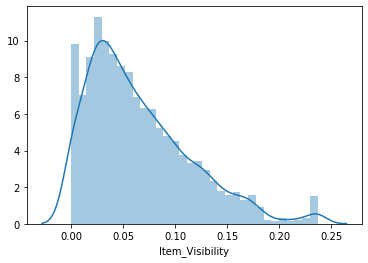

In [74]:
sns.distplot(test['Item_Visibility'])

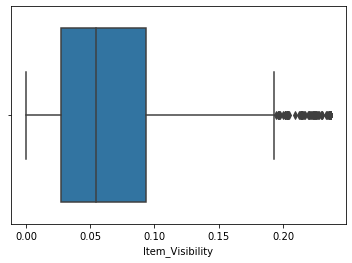

In [75]:
sns.boxplot(test['Item_Visibility'])

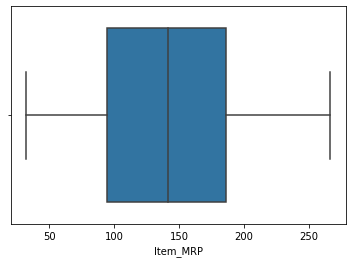

In [76]:
sns.boxplot(test['Item_MRP'])

In [77]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [78]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

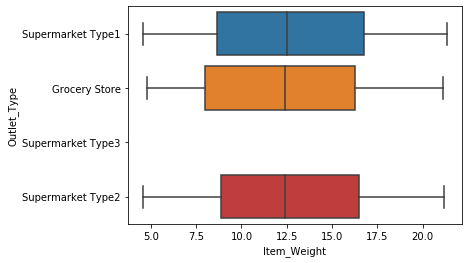

In [79]:
sns.boxplot(y=test['Outlet_Type'],x=test['Item_Weight'])

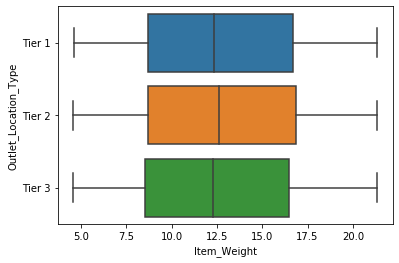

In [80]:
sns.boxplot(y=test['Outlet_Location_Type'],x=test['Item_Weight'])

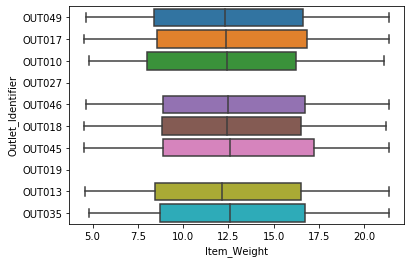

In [81]:
sns.boxplot(y=test['Outlet_Identifier'],x=test['Item_Weight'])

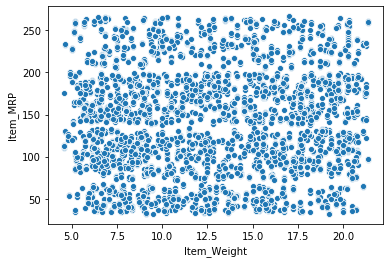

In [82]:
sns.scatterplot(y=test['Item_MRP'], x=test['Item_Weight'])

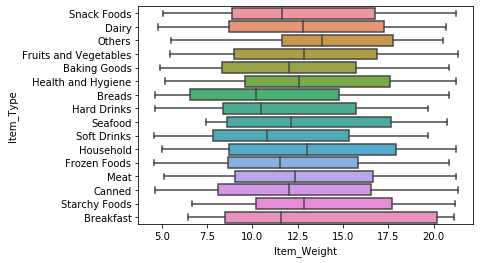

In [83]:
sns.boxplot(y=test['Item_Type'],x=test['Item_Weight'])

In [84]:
pd.crosstab(test['Item_Type'], test['Item_Weight'].isnull())

Item_Weight,False,True
Item_Type,,
Baking Goods,364,74
Breads,139,26
Breakfast,63,13
Canned,359,76
Dairy,375,79
Frozen Foods,457,113
Fruits and Vegetables,648,133
Hard Drinks,120,28
Health and Hygiene,280,58


In [85]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].groupby(test['Item_Type']).transform('mean'))

In [86]:
test['Item_Weight'].isnull().sum()

0

In [87]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.31500,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.95504,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


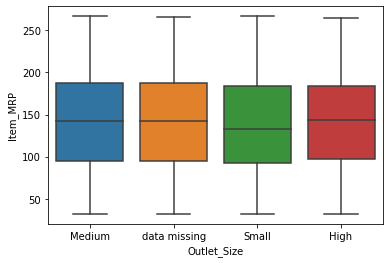

In [88]:
sns.boxplot(test['Outlet_Size'].fillna('data missing'), test['Item_MRP'])

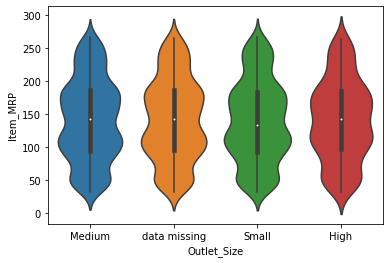

In [89]:
sns.violinplot(test['Outlet_Size'].fillna('data missing'), test['Item_MRP'])

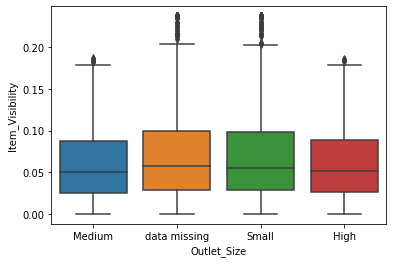

In [90]:
sns.boxplot(test['Outlet_Size'].fillna('data missing'), test['Item_Visibility'])

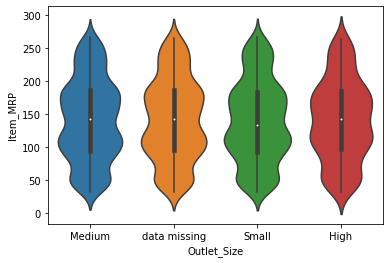

In [91]:
sns.violinplot(test['Outlet_Size'].fillna('data missing'), test['Item_MRP'])

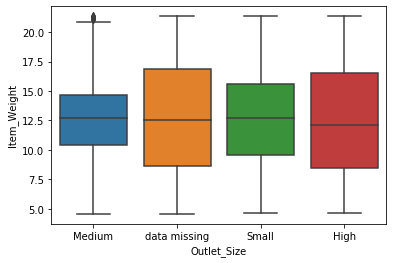

In [92]:
sns.boxplot(test['Outlet_Size'].fillna('data missing'), test['Item_Weight'])

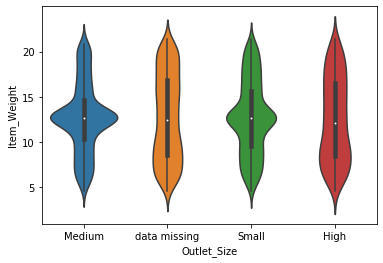

In [93]:
sns.violinplot(test['Outlet_Size'].fillna('data missing'), test['Item_Weight'])

In [94]:
test['Outlet_Size']=test['Outlet_Size'].fillna('High')

# Train Test append and dummification

In [95]:
train.shape

(8523, 12)

In [96]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [97]:
test.shape

(5681, 11)

In [98]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [99]:
data_1=train.append(test)

In [100]:
data_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [101]:
data_1['Outlet_Establishment_Year'].describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [102]:
data_1['Tenure']=2020-data_1['Outlet_Establishment_Year']

In [103]:
data_1['Item_Identifier'].str[:2].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64

In [104]:
data_1['Item_Identifier_1']=data_1['Item_Identifier'].str[:2]

In [105]:
data_1.shape

(14204, 14)

In [106]:
data_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Tenure,Item_Identifier_1
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,22,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33,NC


In [107]:
data_1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Tenure                          0
Item_Identifier_1               0
dtype: int64

In [108]:
df=pd.concat([train.isnull().sum(),test.isnull().sum(),data_1.isnull().sum()],axis="columns",keys=['train','test','data_1'])
df

,train,test,data_1
Item_Identifier,0.0,0.0,0
Item_Weight,0.0,0.0,0
Item_Fat_Content,0.0,0.0,0
Item_Visibility,0.0,0.0,0
Item_Type,0.0,0.0,0
Item_MRP,0.0,0.0,0
Outlet_Identifier,0.0,0.0,0
Outlet_Establishment_Year,0.0,0.0,0
Outlet_Size,0.0,0.0,0
Outlet_Location_Type,0.0,0.0,0


In [109]:
train_cl=data_1[data_1['Item_Outlet_Sales'].notnull()]
test_cl=data_1[data_1['Item_Outlet_Sales'].isnull()]

In [110]:
train_cl.shape

(8523, 14)

In [111]:
train_cl.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Tenure,Item_Identifier_1
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,22,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33,NC


In [112]:
train_cl.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Tenure                       0
Item_Identifier_1            0
dtype: int64

In [113]:
train_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Tenure                     8523 non-null   int64  
 13  Item_Identifier_1          8523 non-null   objec

In [114]:
train_cl.drop(['Item_Identifier','Item_Weight','Item_Visibility', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [115]:
train_cl.shape

(8523, 10)

In [117]:
test_cl.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Tenure,Item_Identifier_1
0,FDW58,20.75000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,21,FD
1,FDW14,8.30000,reg,0.038428,Dairy,87.3198,OUT017,2007,High,Tier 2,Supermarket Type1,NaN,13,FD
2,NCN55,14.60000,Low Fat,0.099575,Others,241.7538,OUT010,1998,High,Tier 3,Grocery Store,NaN,22,NC
3,FDQ58,7.31500,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,High,Tier 2,Supermarket Type1,NaN,13,FD
4,FDY38,12.95504,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,35,FD


In [118]:
test_cl.drop(['Item_Identifier','Item_Visibility', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [119]:
test_cl.drop(['Item_Weight'], axis=1, inplace=True)

In [120]:
test_cl.shape

(5681, 10)

In [121]:
test_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Fat_Content      5681 non-null   object 
 1   Item_Type             5681 non-null   object 
 2   Item_MRP              5681 non-null   float64
 3   Outlet_Identifier     5681 non-null   object 
 4   Outlet_Size           5681 non-null   object 
 5   Outlet_Location_Type  5681 non-null   object 
 6   Outlet_Type           5681 non-null   object 
 7   Item_Outlet_Sales     0 non-null      float64
 8   Tenure                5681 non-null   int64  
 9   Item_Identifier_1     5681 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 488.2+ KB


In [122]:
print(train_cl.shape)
print(test_cl.shape)

(8523, 10)
(5681, 10)


In [123]:
train_cl=pd.get_dummies(train_cl,drop_first=True)
test_cl=pd.get_dummies(test_cl,drop_first=True)

In [124]:
print(train_cl.shape)
print(test_cl.shape)

(8523, 40)
(5681, 40)


# Model Building

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics

In [126]:
train_Y=train_cl['Item_Outlet_Sales']
train_X=train_cl.drop('Item_Outlet_Sales', axis=1)

In [127]:
train_Y.isnull().sum()

0

In [128]:
train_X.isnull().sum()

Item_MRP                           0
Tenure                             0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
Outlet_Identifier_OUT019           0
Outlet_Identifier_OUT027           0
Outlet_Identifier_OUT035           0
O

In [129]:
test_Y=test_cl['Item_Outlet_Sales']
test_X=test_cl.drop('Item_Outlet_Sales', axis=1)

In [130]:
train_X.head()

,Item_MRP,Tenure,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_1_FD,Item_Identifier_1_NC
0,249.8092,21,1,0,0,0,0,0,0,1,...,1,1,0,0,0,1,0,0,1,0
1,48.2692,11,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2,141.6180,21,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,182.0950,22,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,53.8614,33,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [131]:
#x_train, x_test, y_train, y_test=train_test_split(train_X,train_Y, test_size=0.3, random_state=7)

In [132]:
model=LinearRegression()

In [133]:
model.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
y_pred=model.predict(test_X)

In [138]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [139]:
print(model.intercept_)
print(model.coef_)

-1201.567550900516
[  15.56958341   17.47906114   31.1462541    75.83947994   77.84085729
  -28.65534439    5.19120863    2.23035392   24.9747181   -53.13003758
  -26.93049609   29.63454079  -48.77764422   -3.31625365  -33.78986047
    1.08996158  -14.95316404  182.3395735   -11.23122092  -74.72647953
   24.77991089  110.42848828  309.20857893  245.27792744 -510.85946651
  898.53164703  296.28009896   47.38026587  683.59930304 -527.56410961
  616.24546486 -726.67395314  652.86894375 -298.04467068  919.33262547
  245.27792744  898.53164703  -48.91101499  -52.05927816]


In [140]:
import statsmodels.api as sm

In [142]:
x_train_sm=sm.add_constant(train_X)

In [145]:
model_1=sm.OLS(train_Y,x_train_sm).fit()

In [146]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     365.8
Date:                Sat, 17 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:16:12   Log-Likelihood:                -71988.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8492   BIC:                         1.443e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            -313.9257     37.162     -8.448      0.000    -386.772    -241.079
Item_MRP                           15.5696      0.198     78.581      0.000      15.181      15.958
Tenure                             -3.7587      2.665     -1.410      0.158      -8.983       1.466
Item_Fat_Content_Low Fat           31.1463     65.573      0.475      0.635     -97.394     159.686
Item_Fat_Content_Regular           75.8395     68.085      1.114      0.265     -57.624     209.303
Item_Fat_Content_low fat           77.8409    124.433      0.626      0.532    -166.078     321.760
Item_Fat_Content_reg              -28.6553    122.987     -0.233      0.816    -269.740     212.429
Item_Type_Breads                    5.1912     84.031      0.062      0.951    -159.530     169.913
Item_Type_Breakfast                 2.2304    116.564      0.019      0.985    -226.264     230.725
Item_Type_Canned                   24.9747     62.775      0.398      0.691     -98.080     148.030
Item_Type_Dairy                   -53.1300     65.995     -0.805      0.421    -182.496      76.236
Item_Type_Frozen Foods            -26.9305     58.860     -0.458      0.647    -142.311      88.450
Item_Type_Fruits and Vegetables    29.6345     54.920      0.540      0.589     -78.022     137.291
Item_Type_Hard Drinks             -48.7776    139.581     -0.349      0.727    -322.390     224.834
Item_Type_Health and Hygiene       -3.3163     52.728     -0.063      0.950    -106.676     100.044
Item_Type_Household               -33.7899     47.701     -0.708      0.479    -127.295      59.715
Item_Type_Meat                      1.0900     70.626      0.015      0.988    -137.353     139.533
Item_Type_Others                  -14.9532     73.004     -0.205      0.838    -158.059     128.153
Item_Type_Seafood                 182.3396    148.037      1.232      0.218    -107.849     472.528
Item_Type_Snack Foods             -11.2312     55.232     -0.203      0.839    -119.499      97.037
Item_Type_Soft Drinks             -74.7265    128.057     -0.584      0.560    -325.750     176.297
Item_Type_Starchy Foods            24.7799    103.054      0.240      0.810    -177.231     226.791
Outlet_Identifier_OUT013          228.5150     22.656     10.086      0.000     184.104     272.926
Outlet_Identifier_OUT017          211.6459     32.516      6.509      0.000     147.907     275.384
Outlet_Identifier_OUT018           91.1111     27.014      3.373      0.001      38.158     144.064
Outlet_Identifier_OUT019         -401.8153     29.552    -13.597      0.000    -459.744    -343.886
Outlet_Identifier_OUT027          999.2175     20.538     48.652      0.000     958.958    1039.477
Outlet_Identifier_OUT035          262.4306     31.105      8.437      0.000     201

In [150]:
y_pred=model.predict(test_X)

In [151]:
pred1=pd.concat([test,pd.DataFrame({'Item_Outlet_Sales':y_pred})],axis=1)
pred1=pred1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
pred1.to_csv("prediction file2.csv",index=False)


Text(0.5, 0.98, 'Actual vs Predicted')

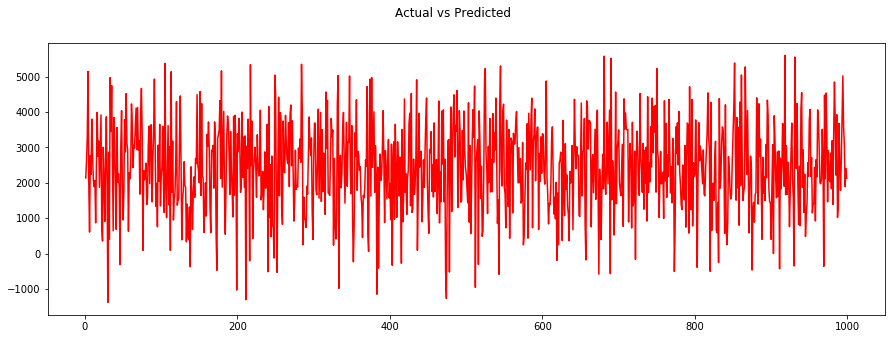

In [153]:
c=[i for i in range(1,1000,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,test_Y[1:1000],color="blue")
plt.plot(c,y_pred[1:1000],color="red")
fig.suptitle("Actual vs Predicted")

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [158]:
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(train_X.values, i) for i in range (train_X.shape[1])]
vif["features"]=train_X.columns

In [159]:
vif.round(2)

,VIF Factor,features
0,1.02,Item_MRP
1,inf,Tenure
2,6.92,Item_Fat_Content_Low Fat
3,6.94,Item_Fat_Content_Regular
4,1.34,Item_Fat_Content_low fat
5,1.37,Item_Fat_Content_reg
6,1.35,Item_Type_Breads
7,1.16,Item_Type_Breakfast
8,1.85,Item_Type_Canned
9,2.14,Item_Type_Dairy
